How well can we predict whether or not an article will be shared based on its readability, sentiment, and clickbait score?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("fake_news_dataset.csv")

df.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


Dataset shape: (4000, 24)

Columns: ['id', 'title', 'author', 'text', 'state', 'date_published', 'source', 'category', 'sentiment_score', 'word_count', 'char_count', 'has_images', 'has_videos', 'readability_score', 'num_shares', 'num_comments', 'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score', 'source_reputation', 'clickbait_score', 'plagiarism_score', 'label']

Basic statistics:


,id,sentiment_score,word_count,char_count,has_images,has_videos,readability_score,num_shares,num_comments,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score
count,4000.000000,4000.000000,4000.000000,4000.0000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,2000.500000,-0.000645,795.655750,4277.0680,0.49650,0.484500,54.764595,25144.596750,489.870250,0.497000,49.960750,5.54925,0.494447,50.598110
std,1154.844867,0.574768,406.373871,2186.2073,0.50005,0.499822,14.404027,14387.537467,287.435733,0.500054,29.467911,2.87422,0.289138,28.932298
min,1.000000,-1.000000,100.000000,500.0000,0.00000,0.000000,30.020000,39.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.040000
25%,1000.750000,-0.490000,445.750000,2358.7500,0.00000,0.000000,42.480000,12781.750000,238.000000,0.000000,24.000000,3.00000,0.240000,25.915000
50%,2000.500000,-0.010000,793.000000,4287.0000,0.00000,0.000000,54.235000,25308.500000,483.000000,0.000000,50.000000,6.00000,0.490000,51.480000
75%,3000.250000,0.510000,1150.000000,6206.5000,1.00000,1.000000,67.215000,37453.500000,741.000000,1.000000,76.000000,8.00000,0.740000,75.580000
max,4000.000000,1.000000,1500.000000,7996.0000,1.00000,1.000000,79.980000,50000.000000,1000.000000,1.000000,100.000000,10.00000,1.000000,99.950000



Missing values:


id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

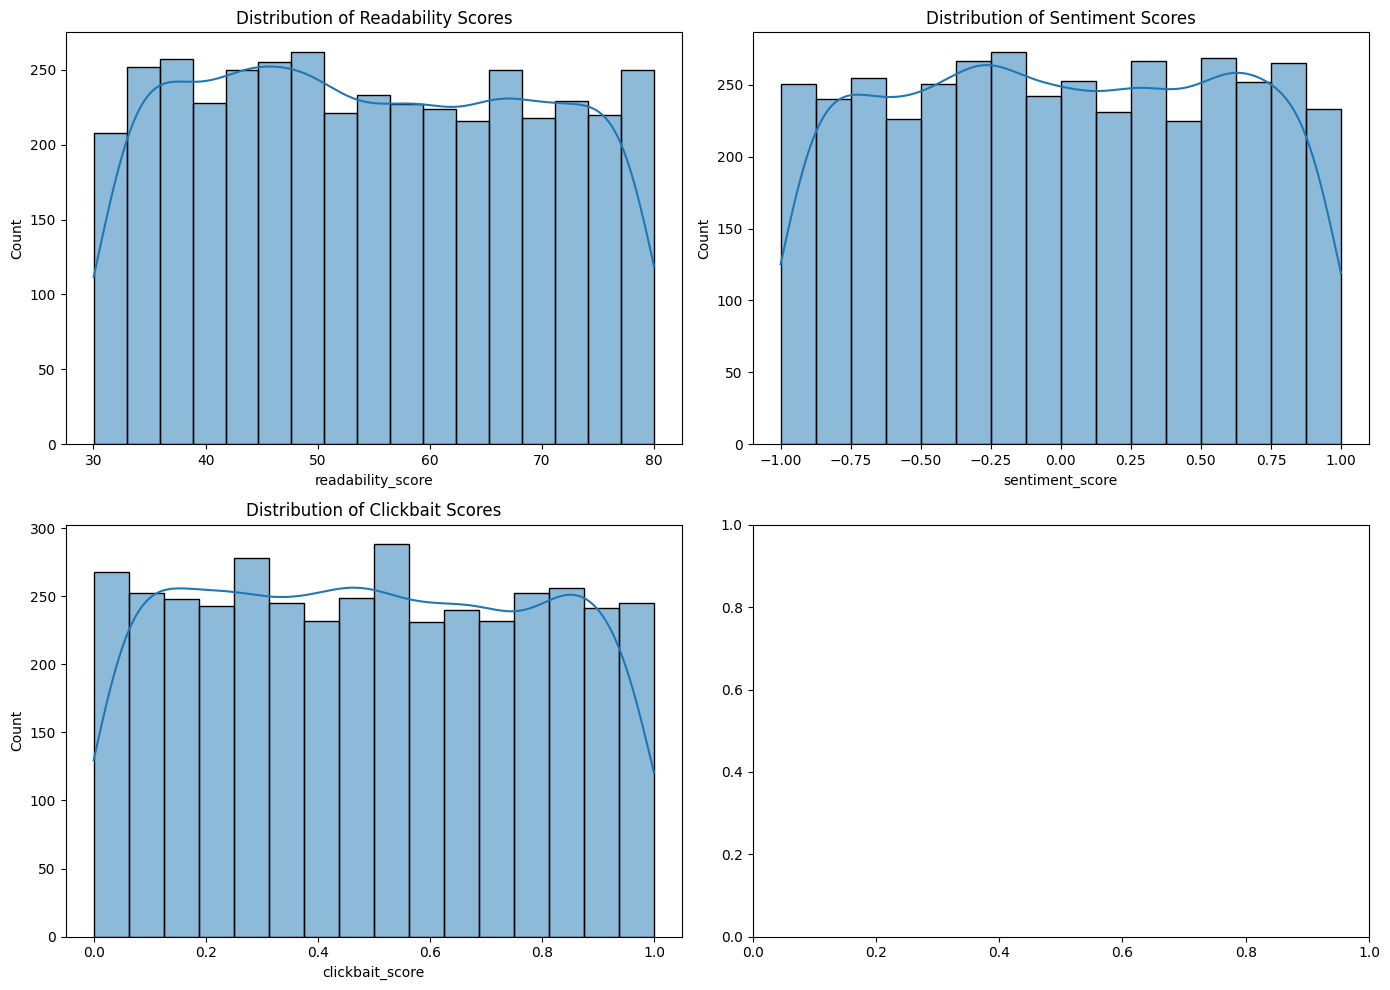